# **ALP Data Mining Group 17**
## **Bank Dataset**
### Richo Ivan Ardiyanto / 0706022310007
### Jefferson Wesley Liunardi / 0706022310046
### Andrew Hendrawan / 0706022310003


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

### **Bank Marketing Dataset Info**

Bank Marketing Dataset

The dataset used in this analysis is the Bank Marketing Dataset, which contains information about customer characteristics and bank marketing interaction history. This dataset is used to analyze the relationships between customer attributes using the Association Rules Mining method.

Attribute Description

Demographic Attributes

age: Customer age

job: Customer's occupation type

marital: Marital status

education: Education level

Financial Attributes

balance: Average customer account balance

housing: Home loan ownership status

loan: Personal loan ownership status

default: Credit default status

Marketing Interaction Attributes

contact: Type of communication contact used

day: Day of the last contact

month: Month of the last contact

duration: Duration of the last contact

campaign: Number of contacts performed during the current campaign

pdays: Number of days since the previous contact

previous: Number of previous contacts

poutcome: Outcome of the previous marketing campaign

Target Attribute

deposit: Status of whether the customer subscribed to a term deposit or not

### **LOAD DATASET**

In [ ]:
# Load dataset from Github
url = "https://raw.githubusercontent.com/Richoivan/Datamining_Richoivan/main/bank.csv"
df = pd.read_csv(url)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **Exploratory Data Analysis (EDA)**

With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.

Data Overview
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Check missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Display unique values for each column in the DataFrame
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
------------------------------
Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
------------------------------
Unique values in column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']
------------------------------
Unique values in column 'default':
['no' 'yes']
------------------------------
Unique values in column 'balance':
[2343   45 1270 ... 1594 2593 -134]
------------------------------
Unique values in column 'housing':
['yes' 'no']
------------------------------
Unique values in colum

Based on the missing value assessment, all attributes in the dataset contain complete values with no missing data. Therefore, no missing value handling was required, and the data preparation stage was focused on relevant data transformations to support the Association Rules Mining process.

In [ ]:
# Copy dataframe
df_bin = df.copy()

# Binning on numerical columns
df_bin['age_group'] = pd.cut(
    df_bin['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['young', 'adult', 'middle_age', 'senior']
)

df_bin['balance_group'] = pd.cut(
    df_bin['balance'],
    bins=[-float('inf'), 0, 1000, float('inf')],
    labels=['low', 'medium', 'high']
)

df_bin['campaign_group'] = pd.cut(
    df_bin['campaign'],
    bins=[0, 2, 5, float('inf')],
    labels=['few', 'medium', 'many']
)

df_bin['pdays_group'] = df_bin['pdays'].apply(
    lambda x: 'not_contacted' if x == -1 else 'contacted_before'
)

df_bin['previous_group'] = df_bin['previous'].apply(
    lambda x: 'no_previous_contact' if x == 0 else 'previous_contact'
)

# Preview the binning results
df_bin[['age_group', 'balance_group', 'campaign_group',
        'pdays_group', 'previous_group']].head()


,age_group,balance_group,campaign_group,pdays_group,previous_group
0,middle_age,high,few,not_contacted,no_previous_contact
1,middle_age,medium,few,not_contacted,no_previous_contact
2,adult,high,few,not_contacted,no_previous_contact
3,middle_age,high,few,not_contacted,no_previous_contact
4,middle_age,medium,few,not_contacted,no_previous_contact


Binning was applied to transform numerical attributes into categorical variables so they can be treated as items in Association Rules Mining. In addition, binning simplifies the data, reduces numerical complexity, and improves the interpretability of association patterns among customer characteristics.

### **Customer Profile Patterns**

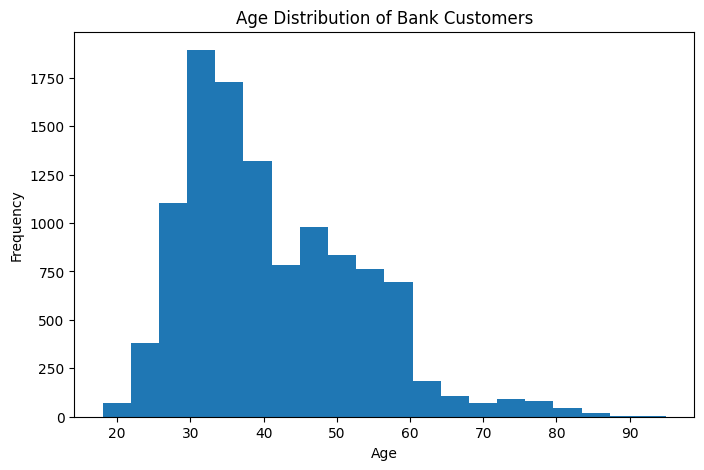

In [ ]:
# Histogram plot visualize the age distribution of bank customers
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20)
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution visualization shows that most bank customers fall within the productive age range, particularly between 25 and 45 years. Customer frequency declines as age increases, with relatively fewer elderly customers. This pattern indicates that the bank’s services and marketing campaigns primarily target productive-age individuals, who are more likely to have higher financial activity.

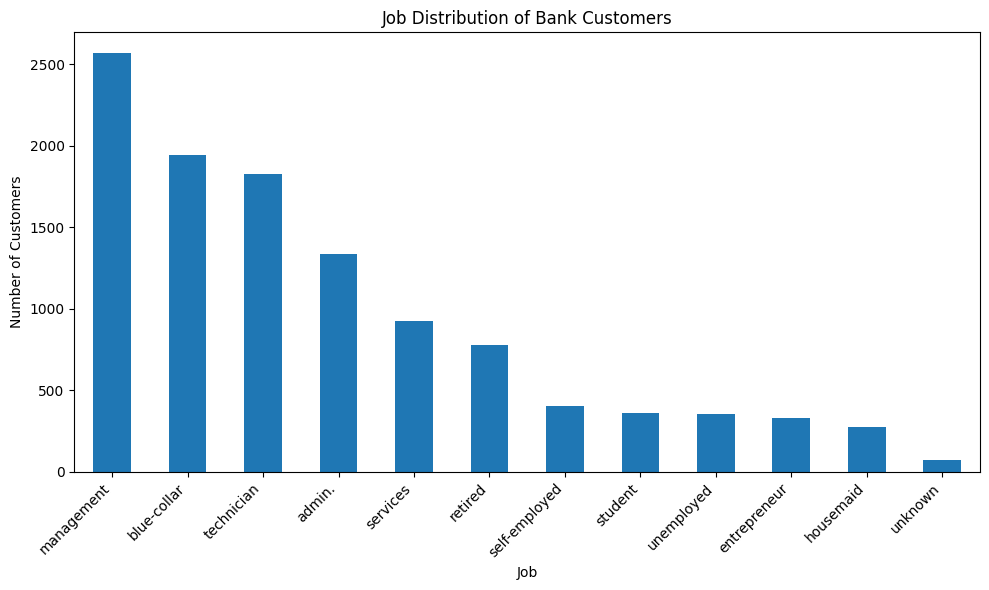

In [ ]:
# Bar chart to visualize the job distribution of bank customers
job_counts = df['job'].value_counts()

plt.figure(figsize=(10,6))
job_counts.plot(kind='bar')
plt.title('Job Distribution of Bank Customers')
plt.xlabel('Job')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This visualization shows that most bank customers come from the management, blue-collar, and technician job categories. In contrast, job categories such as housemaid and unknown have relatively few customers. This distribution indicates that the bank’s customer base is dominated by specific occupational groups, which may influence the patterns and relationships identified in the Association Rules Mining analysis.

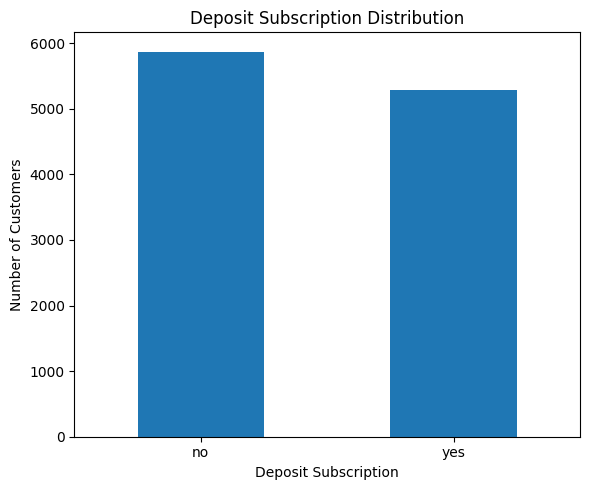

In [ ]:
# Bar chart to visualize the distribution of deposit subscriptions
deposit_counts = df['deposit'].value_counts()

plt.figure(figsize=(6,5))
deposit_counts.plot(kind='bar')
plt.title('Deposit Subscription Distribution')
plt.xlabel('Deposit Subscription')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This visualization shows that the number of customers who do not subscribe to deposits is higher than those who do. This information is important as an initial overview before performing Association Rules Mining, particularly for analyzing patterns in customer characteristics that may influence deposit subscription decisions.

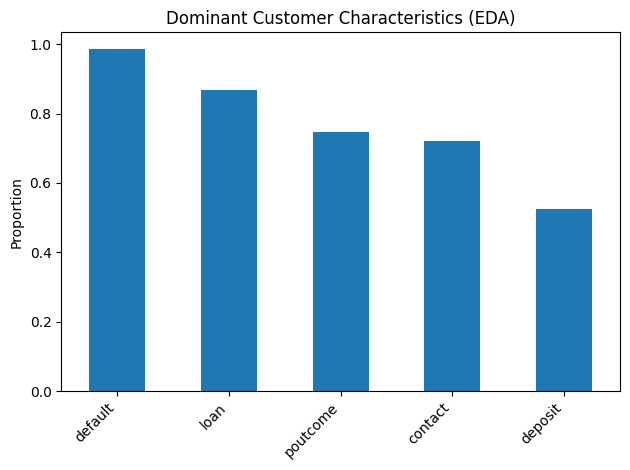

In [ ]:
# Visualize the most dominant categories across selected categorical features using proportional frequency
eda_cols = ['default', 'loan', 'poutcome', 'contact', 'deposit']

# Calculate the proportion of the most frequent category in each column
top_items = (
    df[eda_cols]
    .apply(lambda x: x.value_counts(normalize=True).iloc[0])
    .sort_values(ascending=False)
)

# Select top 5 dominant characteristics
top_items = top_items.head(5)

# Plot the results
plt.figure()
top_items.plot(kind='bar')
plt.title('Dominant Customer Characteristics (EDA)')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization highlights the items with the highest support values, representing the customer characteristics that appear most frequently in the dataset, such as having no loans and not having been previously contacted. This information provides an important initial overview prior to performing Association Rules Mining to analyze patterns and relationships among customer characteristics.

### **ENCODING**

Categorical variables were transformed into binary features using one-hot encoding to convert the dataset into a transactional format suitable for Association Rules Mining. This encoding ensures that each category is represented consistently and allows frequent itemsets and association rules to be generated effectively.

In [ ]:
# Prepare a transaction matrix with one-hot encoding for Association Rules Mining
df_transactions = df_bin.copy()

# Select columns used for association analysis
cols_for_association = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome', 'deposit',
    'age_group', 'balance_group', 'campaign_group',
    'pdays_group', 'previous_group'
]

# Apply one-hot encoding to create a boolean transaction matrix
df_transactions = pd.get_dummies(
    df_transactions[cols_for_association],
    prefix_sep='='
).astype(bool)

# Preview the transformed data
df_transactions.head()


,job=admin.,job=blue-collar,job=entrepreneur,job=housemaid,job=management,job=retired,job=self-employed,job=services,job=student,job=technician,...,balance_group=low,balance_group=medium,balance_group=high,campaign_group=few,campaign_group=medium,campaign_group=many,pdays_group=contacted_before,pdays_group=not_contacted,previous_group=no_previous_contact,previous_group=previous_contact
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False


### **MODEL COMPLEXITY**

### **Association Rules – Parameter Exploration**

This parameter exploration analyzes how different minimum support and confidence values affect the number of frequent itemsets and association rules generated. The results help justify the selection of optimal thresholds for the final association rules model by balancing rule quantity and reliability.


In [ ]:
# Evaluate the impact of different support and confidence thresholds on frequent itemsets and rule generation
def evaluate_support_confidence(
    df_transactions,
    support_values,
    confidence_values,
    max_len=2
):
    results = []

    for sup in support_values:

        frequent_itemsets = apriori(
            df_transactions,
            min_support=sup,
            use_colnames=True,
            max_len=max_len
        )

        for conf in confidence_values:
            if frequent_itemsets.empty:
                rules_count = 0
            else:
                rules = association_rules(
                    frequent_itemsets,
                    metric="confidence",
                    min_threshold=conf
                )
                rules_count = len(rules)

            results.append({
                "min_support": sup,
                "min_confidence": conf,
                "frequent_itemsets_count": len(frequent_itemsets),
                "rules_count": rules_count
            })

    return pd.DataFrame(results)


The results show that lower minimum support values generate a higher number of frequent itemsets and association rules, indicating broader pattern coverage but increased model complexity. As the support threshold increases, both the number of frequent itemsets and generated rules decrease, reflecting a stricter requirement for item frequency and more conservative pattern discovery.

Similarly, increasing the minimum confidence threshold reduces the number of rules produced, as only more reliable and consistent associations are retained. This demonstrates a clear trade-off between rule quantity and rule reliability, where higher confidence values lead to fewer but stronger rules. Overall, this evaluation provides a justified basis for selecting appropriate support and confidence thresholds that balance interpretability, reliability, and analytical usefulness in the final association rules model.

### **Association Rules – Model Complexity and Comparison**

To satisfy the model complexity requirement, multiple association rule configurations were tested
using different minimum support and confidence thresholds. Each configuration was treated as a
distinct model, and their results were compared to identify the best-performing setup.



In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

support_values = [0.02, 0.03, 0.05]
confidence_values = [0.6, 0.7, 0.8, 0.9]

results = []

for sup in support_values:
    # Apriori for every support
    frequent_itemsets = apriori(
        df_transactions,
        min_support=sup,
        use_colnames=True,
        max_len=2
    )

    for conf in confidence_values:
        if frequent_itemsets.empty:
            rules = pd.DataFrame()
        else:
            rules = association_rules(
                frequent_itemsets,
                metric='confidence',
                min_threshold=conf
            )

        results.append({
            'Min Support': sup,
            'Min Confidence': conf,
            'Frequent Itemsets Count': len(frequent_itemsets),
            'Rules Count': len(rules),
            'Average Lift': rules['lift'].mean() if len(rules) > 0 else 0,
            'Max Lift': rules['lift'].max() if len(rules) > 0 else 0
        })

comparison_df = pd.DataFrame(results)
comparison_df


,Min Support,Min Confidence,Frequent Itemsets Count,Rules Count,Average Lift,Max Lift
0,0.02,0.6,880,409,1.187126,10.824856
1,0.02,0.7,880,327,1.214222,10.824856
2,0.02,0.8,880,193,1.271664,4.711856
3,0.02,0.9,880,104,1.328355,3.933051
4,0.03,0.6,733,366,1.177925,10.824856
5,0.03,0.7,733,288,1.205040,10.824856
6,0.03,0.8,733,171,1.256006,3.933051
7,0.03,0.9,733,97,1.349332,3.933051
8,0.05,0.6,556,323,1.138913,3.933051
9,0.05,0.7,556,261,1.149967,3.933051


### **Model Evaluation & Selection**

In [ ]:
best_model = comparison_df.sort_values(
    by=['Average Lift', 'Min Confidence'],
    ascending=[False, False]
).iloc[0]

best_model

,7
Min Support,0.030000
Min Confidence,0.900000
Frequent Itemsets Count,733.000000
Rules Count,97.000000
Average Lift,1.349332
Max Lift,3.933051


The best model was selected by prioritizing the highest Average Lift and Minimum Confidence, as these metrics indicate the strongest and most reliable association rules. Based on this evaluation, the combination of min_support = 0.03 and min_confidence = 0.9 produced the most robust rules, characterized by very high confidence and strong relationships between items. Although this configuration generated fewer rules, the resulting patterns are highly reliable and suitable for high-confidence decision-makin

### **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [ ]:
# Create a transaction–item basket for Association Rules Mining
# Using one-hot encoded boolean data
basket = df_transactions.copy()

basket.head()


,job=admin.,job=blue-collar,job=entrepreneur,job=housemaid,job=management,job=retired,job=self-employed,job=services,job=student,job=technician,...,balance_group=low,balance_group=medium,balance_group=high,campaign_group=few,campaign_group=medium,campaign_group=many,pdays_group=contacted_before,pdays_group=not_contacted,previous_group=no_previous_contact,previous_group=previous_contact
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False


In [ ]:
# Generate frequent itemsets from the transaction basket using a minimum support of 0.03
frequent_itemsets = apriori(
    basket,
    min_support=0.03,
    use_colnames=True
)

frequent_itemsets


In [ ]:
# Limit itemset length to 2, generate association rules with confidence ≥ 0.9, and filter by lift ≥ 1
frequent_itemsets = frequent_itemsets.copy()
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] <= 2]

# Generate association rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.9
)

# Filter rules with lift ≥ 1 and display top 10 by lift
rules = rules[rules['lift'] >= 1]

rules.sort_values(by='lift', ascending=False).head(10)


### **Insights, Interpretations and Conclusions**

The association rules mining process successfully uncovers meaningful patterns in customer characteristics and behaviors, providing a strong foundation for data-driven decision-making. The analysis offers both general insights about the customer base and specific actionable recommendations derived from the strongest rules.

1. Customer Segmentation by Age and Job
The model confirms a strong link between age and occupation. For example, most senior customers are retired, and students are predominantly young. This indicates that demographic attributes are highly predictive of financial behaviors, enabling precise customer segmentation for targeted services. Financial products and campaigns can be customized according to age and occupation to maximize engagement and relevance.

2. Behavioral Patterns in Marketing Response
Customers with prior contact history are more likely to respond positively to campaigns, while non-responders are often still previously contacted. This suggests that engagement history is a critical predictor of marketing success. The bank can leverage this information to prioritize follow-ups and optimize campaign timing and methods.

3. High-Frequency Customer Characteristics
Dominant characteristics, such as having no loans or prior contact, represent patterns that occur most frequently in the dataset. Identifying these common behaviors helps the bank focus on operational planning, product design, and service delivery for the majority of its customers.

4. Effectiveness of Prior Contact in Conversion
The bidirectional relationship between prior contact status and recency demonstrates that both historical and temporal aspects of customer interactions influence responsiveness. Understanding this relationship allows the bank to optimize communication frequency, scheduling, and strategy to improve conversion rates.

5. Actionable Insights from Specific Association Rules

**Rule 1: (poutcome = other) → (previous_group = previous_contact)**

Insight:
Customers with an “other” outcome from previous marketing campaigns were always customers who had been contacted before. This rule shows a perfect confidence, indicating a very strong and consistent relationship.

Recommendation:
The bank should leverage historical contact data to identify customers who require alternative communication strategies, such as different messaging content or channels.

**Rule 2: (poutcome = failure) → (pdays_group = contacted_before)**

Insight:
All customers who experienced campaign failure had been contacted previously. This suggests that unsuccessful outcomes are not due to lack of exposure but rather the effectiveness of the campaign approach.

Recommendation:
Marketing strategies for previously contacted customers should be refined by adjusting contact timing, personalization, or product offerings to improve future success rates.

**Rule 3: (poutcome = success) → (previous_group = previous_contact)**

Insight:
Every successful campaign outcome occurred among customers who had prior contact history. This highlights the importance of repeated engagement in achieving positive responses.

Recommendation:
The bank should prioritize customers with prior contact history when launching new marketing campaigns, as they have a higher likelihood of responding positively.

**Rule 4: (previous_group = previous_contact) ↔ (pdays_group = contacted_before)**

Insight:
There is a strong bidirectional relationship between having previous contact and being contacted before, with perfect confidence and high lift. This confirms the consistency of customer interaction records.

Recommendation:
Previous contact information should be used as a core feature in customer segmentation models to manage contact frequency and optimize marketing strategies.

**Rule 5: (job = student) → (marital = single)**

Insight:
Customers with a student occupation are overwhelmingly single, reflecting a clear demographic pattern with very high confidence.

Recommendation:
The bank can design tailored products for young and single customers, such as low-fee digital savings accounts or student-focused financial products.

Conclusion

The performance of the Association Rules Mining model indicates that the selected configuration is effective in extracting reliable and meaningful patterns from the dataset. The use of a high confidence threshold ensures that the generated rules are highly dependable, while lift values consistently greater than one confirm that the identified associations are statistically significant and not the result of random co-occurrence. The model successfully balances rule strength and coverage, producing a sufficient number of high-quality rules without excessive redundancy.

Furthermore, the consistency of strong rules related to prior contact history, campaign outcomes, and demographic attributes demonstrates the robustness of the model across different customer segments. The ability of the model to uncover rules with perfect confidence and high lift highlights its suitability for analyzing customer behavior and marketing effectiveness. Overall, the model’s performance validates Association Rules Mining as a reliable analytical approach for supporting strategic decision-making, customer targeting, and campaign optimization in the banking domain.